# Module 10 -- Active Information Storage in Cellular Automata

In this activity we will examine Active Information Storage (AIS) in Elementary Cellular Automata rule 54. CAs are wonderful canonical systems to use to explore dynamics of self-organisation in complex systems, in particular regarding emergent structures such as blinkers, gliders and collisions. If you have not played around with CAs before, you can explore dynamics of ECAs using NetLogo via `Sample models | Computer Science | Cellular Automata | CA 1D Elementary` in the Models Library (or access via [NetLogo web](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Computer%20Science/Cellular%20Automata/CA%201D%20Elementary.nlogo) if you don't have an installation): try rules 2, 8, 18, 30, 54, 90, 110, 146, and 254 to see a variety of dynamics.

In this example we will compute the appropriate embedding length manually, and then go on to examine local AIS values and how they relate to emergent structure.

Make sure that you have **downloaded** the sample time-series as directed from the tutorial page. This data set was generated by running CA rule 54 from a random initial condition. The data set contains 10000 cells and 600 time steps (with periodic boundary conditions) -- we use more cells than time steps such that we are sampling the transient dynamics before a steady state is reached.

1. Open the AutoAnalyser and select Active Information Storage. Select a Discrete estimator, select your CA data file, tick the checkbox for `All variables?` and click `Generate Code and Compute`.
2. Copy and paste the generated code into the code cells below.

In [1]:
# Paste the import and JVM startup lines here:

from jpype import *
import numpy
import sys
# Our python data file readers are a bit of a hack, python users will do better on this:
sys.path.append("/home/joseph/JIDT/infodynamics-dist-1.6.1/demos/python")
import readIntsFile

if (not isJVMStarted()):
    # Add JIDT jar library to the path
    jarLocation = "/home/joseph/JIDT/infodynamics-dist-1.6.1/infodynamics.jar"
    # Start the JVM (add the "-Xmx" option with say 1024M if you get crashes due to not enough memory space)
    startJVM(getDefaultJVMPath(), "-ea", "-Djava.class.path=" + jarLocation, convertStrings=True)

In [2]:
# Paste the code loading and analysing the data here:

# 0. Load/prepare the data:
dataRaw = readIntsFile.readIntsFile("/home/joseph/TeachingPlayground/CSYS5030/Week10/ca54.txt")
# As numpy array:
data = numpy.array(dataRaw)
# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
calc = calcClass(2, 1)
# 2. No other properties to set for discrete calculators.

# Compute for all variables:
for v in range(10000):
    # For each variable:
    variable = JArray(JInt, 1)(data[:, v].tolist())

    # 3. Initialise the calculator for (re-)use:
    calc.initialise()
    # 4. Supply the sample data:
    calc.addObservations(variable)
    # 5. Compute the estimate:
    result = calc.computeAverageLocalOfObservations()

    print("AIS_Discrete(col_%d) = %.4f bits" %\
        (v, result))


AIS_Discrete(col_0) = 0.2198 bits
AIS_Discrete(col_1) = 0.1186 bits
AIS_Discrete(col_2) = 0.2140 bits
AIS_Discrete(col_3) = 0.1109 bits
AIS_Discrete(col_4) = 0.2198 bits
AIS_Discrete(col_5) = 0.1167 bits
AIS_Discrete(col_6) = 0.2198 bits
AIS_Discrete(col_7) = 0.1188 bits
AIS_Discrete(col_8) = 0.2192 bits
AIS_Discrete(col_9) = 0.1268 bits
AIS_Discrete(col_10) = 0.2135 bits
AIS_Discrete(col_11) = 0.1231 bits
AIS_Discrete(col_12) = 0.2087 bits
AIS_Discrete(col_13) = 0.1209 bits
AIS_Discrete(col_14) = 0.2002 bits
AIS_Discrete(col_15) = 0.1292 bits
AIS_Discrete(col_16) = 0.1925 bits
AIS_Discrete(col_17) = 0.1271 bits
AIS_Discrete(col_18) = 0.2081 bits
AIS_Discrete(col_19) = 0.1333 bits
AIS_Discrete(col_20) = 0.2078 bits
AIS_Discrete(col_21) = 0.1333 bits
AIS_Discrete(col_22) = 0.2216 bits
AIS_Discrete(col_23) = 0.1395 bits
AIS_Discrete(col_24) = 0.2331 bits
AIS_Discrete(col_25) = 0.1462 bits
AIS_Discrete(col_26) = 0.2243 bits
AIS_Discrete(col_27) = 0.1485 bits
AIS_Discrete(col_28) = 0.2272 

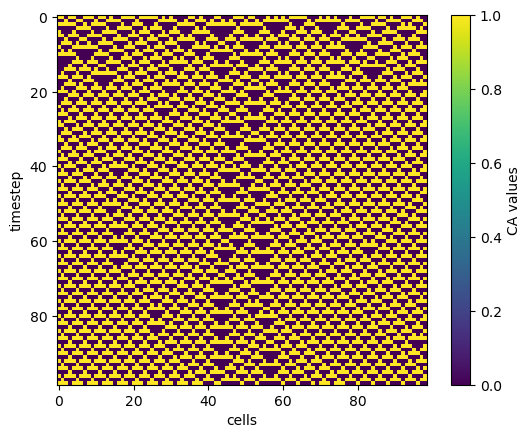

In [3]:
# This code block plots a sample of 100 time steps for 100 cells of the CA:
import matplotlib.pyplot as plt
plt.imshow(data[:99,:99]) # Plotting the first 100 time steps for first 100 cells
plt.xlabel('cells');
plt.ylabel('timestep');
cbar = plt.colorbar()
cbar.set_label('CA values');

3. Examine how the code is computing the AIS for each cell in the CA. Now run the code cells above. Notice the calculation for each CA cell printed above, and notice the variance in these. We would get a much more accurate result if we could make an AIS estimation by pooling all of the samples for the different CA cells together. Reflect on why pooling the samples for technically different time-series processes is valid here, and think of a data set where it would not be a valid approach.
4. Change the code -- perhaps copy a new version into the cell below and change that -- so that, instead of making a separate calculation for each cell, we make one calculation where the samples from all cells are used together. _Hint_: think of which calculation steps should remain inside the loop over variables, and which should now go outside (before or after) -- you can go back to the flow chart for how to use the JIDT estimators in the *Introduction to JIDT lecture*. When you print the final result of the calculation using samples from all variables, also check the number of samples that were used via `calc.getNumObservations()`, which should report a number of observations consistent with having used all of the samples from all cells. If it still reports 599, obviously you've only used samples from one cell. Run the code -- your final answer (if using the sample data set) should be 0.1426 bits.

In [4]:
# Paste the code to start to pool the samples together here:

# 0. Load/prepare the data:
dataRaw = readIntsFile.readIntsFile("/home/joseph/TeachingPlayground/CSYS5030/Week10/ca54.txt")
# As numpy array:
data = numpy.array(dataRaw)
# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
calc = calcClass(2, 1)
# 2. No other properties to set for discrete calculators.

# 3. Initialise the calculator for (re-)use:
calc.initialise()

# Compute for all variables in a single calculation:
for v in range(10000):
    # For each variable:
    variable = JArray(JInt, 1)(data[:, v].tolist())

    # 4. Supply the sample data:
    calc.addObservations(variable)

# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()
print("AIS_Discrete(%d samples from all cells) = %.4f bits" %\
    (calc.getNumObservations(), result))


AIS_Discrete(5990000 samples from all cells) = 0.1426 bits


5. Now, we want to work out the most appropriate value of the history embedding `k` to use via the maximum bias-corrected AIS. JIDT doesn't yet offer an automated way of doing this for AIS Discrete, so we'll do it manually (in any case, this is instructive for us in seeing how an automated approach works). 
    First take a copy of your code pooling the samples above, and paste it into the code cell below. Then:
    1. Add a loop (after loading in the data) over the rest of the calculation, looping over values of `k` from 1 to 20.
    2. Supply your new value of k to the JIDT estimator. To see how if you're not sure, go back to the AutoAnalyser, change the `k` parameter, generate the code and see where the new value is inserted.
    3. Change the print statement for your results to include `k` as well.
    4. Now, the AIS discrete estimator does not include bias correction, so we'll do this manually. Go back to the AutoAnalyser, click the checkbox for `Add stat signif.?` and `analytically?` and generate new code. Go to the Matlab tab and copy the code for step 6 into the Matlab code file you are working on. It should go after where you compute the result. Then, after the analytic surrogate distribution is returned in the object `measDist`, add a line to retrieve the bias via: `bias = measDist.getMeanOfDistribution();`
    5. Now, store all of the computed results and bias values in an array for each value of `k`, and generate the bias-corrected AIS values (`= results - bias`).
    6. Plot the raw computed result, the bias and bias corrected values versus `k`. Identify the optimal value of `k` to use from the maximum bias-corrected AIS. Notice how the bias rises quickly after this, indicating the onset of _undersampling_ for large `k`, with respect to the given number of samples. My result is **k=15**, but statistical fluctuations in your data set could change that slightly.

AIS_Discrete(k=1, 5990000 samples from all cells) = 0.1426 bits (bias 0.0000, bias corrected 0.1426)
AIS_Discrete(k=2, 5980000 samples from all cells) = 0.2260 bits (bias 0.0000, bias corrected 0.2260)
AIS_Discrete(k=3, 5970000 samples from all cells) = 0.5099 bits (bias 0.0000, bias corrected 0.5099)
AIS_Discrete(k=4, 5960000 samples from all cells) = 0.6307 bits (bias 0.0000, bias corrected 0.6307)
AIS_Discrete(k=5, 5950000 samples from all cells) = 0.6624 bits (bias 0.0000, bias corrected 0.6624)
AIS_Discrete(k=6, 5940000 samples from all cells) = 0.6786 bits (bias 0.0000, bias corrected 0.6786)
AIS_Discrete(k=7, 5930000 samples from all cells) = 0.6861 bits (bias 0.0000, bias corrected 0.6860)
AIS_Discrete(k=8, 5920000 samples from all cells) = 0.6961 bits (bias 0.0000, bias corrected 0.6961)
AIS_Discrete(k=9, 5910000 samples from all cells) = 0.7025 bits (bias 0.0000, bias corrected 0.7024)
AIS_Discrete(k=10, 5900000 samples from all cells) = 0.7048 bits (bias 0.0001, bias correct

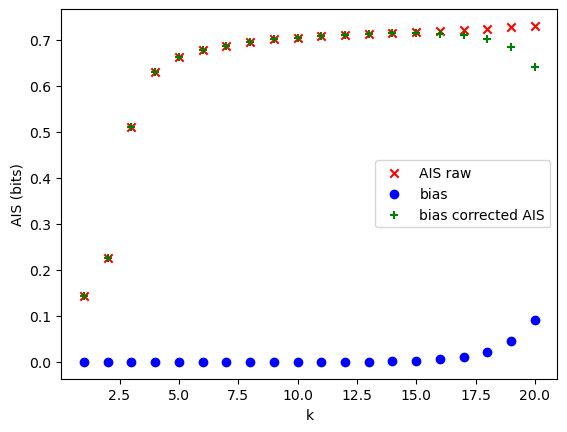

In [5]:
# Paste the code from above here:

# 0. Load/prepare the data:
dataRaw = readIntsFile.readIntsFile("/home/joseph/TeachingPlayground/CSYS5030/Week10/ca54.txt")
# As numpy array:
data = numpy.array(dataRaw)

kMax = 20;
results = numpy.zeros((kMax))
biases = numpy.zeros((kMax))
biasCorrectedResults = numpy.zeros((kMax))

for k in range(1,kMax+1):
    # 1. Construct the calculator:
    calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
    calc = calcClass(2, k)
    # 2. No other properties to set for discrete calculators.
    
    # 3. Initialise the calculator for (re-)use:
    calc.initialise()
    
    # Compute for all variables in a single calculation:
    for v in range(10000):
        # For each variable:
        variable = JArray(JInt, 1)(data[:, v].tolist())
    
        # 4. Supply the sample data:
        calc.addObservations(variable)
    
    # 5. Compute the estimate:
    result = calc.computeAverageLocalOfObservations()
    # 6. Compute the (statistical significance via) null distribution analytically:
    measDist = calc.computeSignificance()
    bias = measDist.getMeanOfDistribution()

    # Store the results:
    results[k-1] = result
    biases[k-1] = bias
    biasCorrectedResults[k-1] = result - bias
    
    print("AIS_Discrete(k=%d, %d samples from all cells) = %.4f bits (bias %.4f, bias corrected %.4f)" %\
        (k, calc.getNumObservations(), result, bias, result - bias))

optimalK = numpy.argmax(biasCorrectedResults)+1 # Need to add 1 for the array offset
print('Optimal k=%d, giving bias corrected AIS(k=%d)=%.4f bits' % (optimalK,optimalK,biasCorrectedResults[optimalK-1])) # subtract 1 for array indexing

plt.scatter(range(1,kMax+1), results, marker='x', color='red', label='AIS raw')
plt.scatter(range(1,kMax+1), biases, marker='o', color='blue', label='bias')
plt.scatter(range(1,kMax+1), biasCorrectedResults, marker='+', color='green', label='bias corrected AIS')
plt.xlabel('k')
plt.ylabel('AIS (bits)')
plt.legend()
plt.show()

6. Now we move on to compute the **local AIS** values using the value of `k` we have determined. Copy the code from the previous cell into a new code cell below, so that we can change it but you can come back later to what you did previously.
    1. Remove the loop over `k`, fixing it simply to the value that you determined. You'll also need to remove the arrays where you stored values for each `k`, and where you plot the values. The code should still compute one value of AIS over all of the cells.
    2. After the value is computed, we'll insert new code to compute the local values.  At the end of your code block after the calculation is complete, add another loop over all cells (copying the loop structure over variables that is already earlier in the code). Inside the loop, select the column data for the given cell (as is done in the earlier loop), and then compute the local AIS values along that variable's column using: `localAISForThisCell = calc.computeLocalFromPreviousObservations(variable);`.
    3. Store all of these columns of local AIS values together in one 2D matrix for all of the cells called locals, i.e. `locals[:,v] = localAISForThisCell;`. (You should initialise locals before the loop)
    4. After the loop, let's plot a small segment of these local values. A simple way to do this would be:
       ```python
       plt.imshow(locals[:99,:99]) # Plotting the first 100 time steps for first 100 cells
       plt.xlabel('cells');
       plt.ylabel('timestep');
       cbar = plt.colorbar()
       cbar.set_label('AIS (bits)');
       ```
       However the colours could be arranged a little better (so that we use blue for positive AIS and red for negative). So instead first import some extra libraries from matplotlib: `import matplotlib.cm as cm; import matplotlib.colors as mplcolors` and then add the following argument to the `plt.imshow()` call: `cmap=cm.coolwarm_r, norm=mplcolors.CenteredNorm()`
    5. Run the code!
    6. (You can ignore the first k time steps here being 0 -- it's simply not possible to compute a local value until we've accumulated k time steps.)
    7. Observe which emergent structures execute the strongest information storage (you may find it useful to replot the raw values here again for comparison). Does this align with our intuition from the lecture? What do the areas with negative local AIS values mean? (Recall the meaning of negative values of local mutual information, and think about what the past embedded state is telling us when the local AIS goes negative)
    8. For further details, you can compare to Fig. 4b and section IV.E (and references therein) of the JIDT paper.

See sample results on the tutorial page / solution notebook. Note that your run, from a different initial condition, will likely be different in the details, but the comparison of local AIS values between blinkers/domains and gliders should qualitatively be the same.

AIS_Discrete(k=15, 5850000 samples from all cells) = 0.7180 bits (bias 0.0028, bias corrected 0.7152)


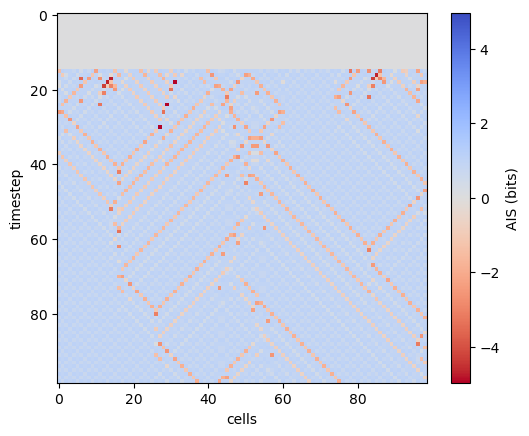

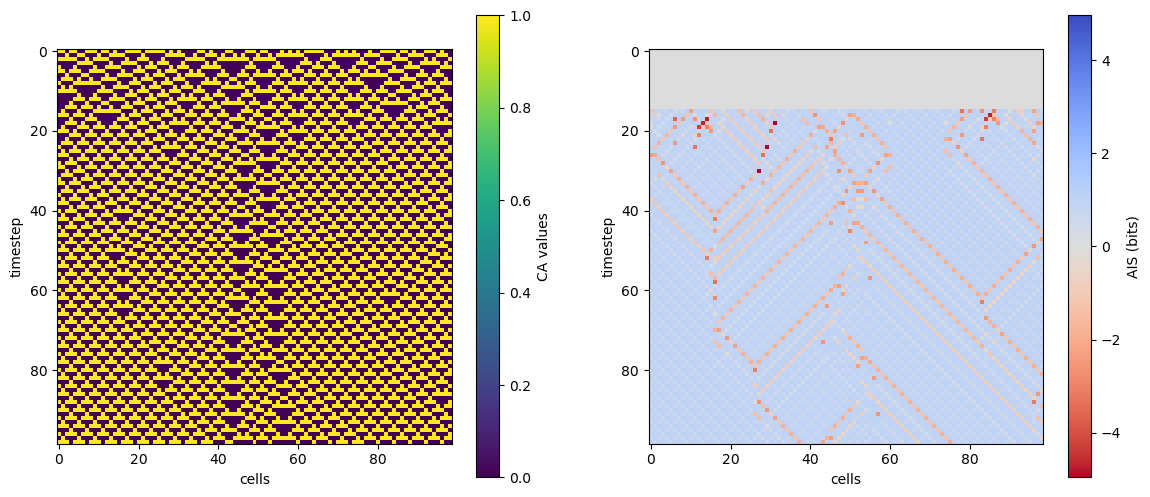

In [6]:
# Paste the completed code above (which finds the optimum value of k) here:

# 0. Load/prepare the data:
dataRaw = readIntsFile.readIntsFile("/home/joseph/TeachingPlayground/CSYS5030/Week10/ca54.txt")
# As numpy array:
data = numpy.array(dataRaw)

k = optimalK; # as determined above

# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
calc = calcClass(2, k)
# 2. No other properties to set for discrete calculators.

# 3. Initialise the calculator for (re-)use:
calc.initialise()

# Compute for all variables in a single calculation:
for v in range(10000):
    # For each variable:
    variable = JArray(JInt, 1)(data[:, v].tolist())

    # 4. Supply the sample data:
    calc.addObservations(variable)

# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()
# 6. Compute the (statistical significance via) null distribution analytically:
measDist = calc.computeSignificance()
bias = measDist.getMeanOfDistribution()

print("AIS_Discrete(k=%d, %d samples from all cells) = %.4f bits (bias %.4f, bias corrected %.4f)" %\
    (k, calc.getNumObservations(), result, bias, result - bias))

# Now let's compute the local AIS values
locals = numpy.zeros(data.shape)
for v in range(10000):
    # For each variable:
    variable = JArray(JInt, 1)(data[:, v].tolist())
    
    # Compute the local AIS for this cell:
    localAISForThisCell = calc.computeLocalFromPreviousObservations(variable);
    locals[:,v] = localAISForThisCell;

# Plot the local AIS values:
import matplotlib.cm as cm
import matplotlib.colors as mplcolors
plt.imshow(locals[:99,:99], cmap=cm.coolwarm_r, norm=mplcolors.CenteredNorm()) # Plotting the first 100 time steps for first 100 cells
plt.xlabel('cells');
plt.ylabel('timestep');
cbar = plt.colorbar()
cbar.set_label('AIS (bits)');

# Finally plotting the raw values together with the information values for comparison:
plt.figure(figsize=(14,6))
# First plot the raw CA values
plt.subplot(1,2,1) # left subplot
plt.imshow(data[:99,:99]) # Plotting the first 100 time steps for first 100 cells
plt.xlabel('cells');
plt.ylabel('timestep');
cbar = plt.colorbar()
cbar.set_label('CA values');
# Next plot the AIS values
plt.subplot(1, 2, 2); # right subplot
plt.imshow(locals[:99,:99], cmap=cm.coolwarm_r, norm=mplcolors.CenteredNorm()) # Plotting the first 100 time steps for first 100 cells
plt.xlabel('cells');
plt.ylabel('timestep');
cbar = plt.colorbar()
cbar.set_label('AIS (bits)');